## Import libraries

In [1]:
%pylab inline
import pandas as pd
import seaborn as sn

Populating the interactive namespace from numpy and matplotlib


## Load csv file

In [3]:
data = pd.read_csv("uber-raw-data-apr14.csv", sep=",")
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [4]:
## Convert Date/Time column to real format
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime)
data.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


## Create useful column before analysis

In [16]:
## Let's get the day of the month
%time
def get_dayOfmonth(dt):
    return dt.day

data['DayOfMonth'] = data['Date/Time'].map(get_dayOfmonth)
data.head()

Wall time: 0 ns


,Date/Time,Lat,Lon,Base,DayOfMonth
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1


In [21]:
## Let's get the weekday
def get_Weekday(dt):
    return dt.weekday()

def get_Hour(dt):
    return dt.hour

data['WeekDay'] = data['Date/Time'].map(get_Weekday)
data['Hour'] = data['Date/Time'].map(get_Hour)
data.head()

,Date/Time,Lat,Lon,Base,DayOfMonth,WeekDay,Hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0


## Analysis of DayOfMonth

Text(0.5,1,'Frequency by DoM - Uber - April 2014')

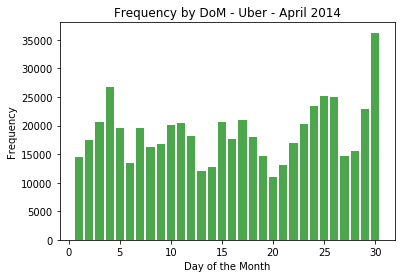

In [32]:
## Let's make a simple histogramm
## Reference : 30 => number of days
hist(data.DayOfMonth, alpha=0.7, bins=30, rwidth=.8, range=(.5, 30.5), color='green')
xlabel('Day of the Month')
ylabel('Frequency')
title('Frequency by DoM - Uber - April 2014')

In [35]:
## first way
for k, rows in data.groupby('DayOfMonth'):
    print((k, len(rows)))

(1, 14546)
(2, 17474)
(3, 20701)
(4, 26714)
(5, 19521)
(6, 13445)
(7, 19550)
(8, 16188)
(9, 16843)
(10, 20041)
(11, 20420)
(12, 18170)
(13, 12112)
(14, 12674)
(15, 20641)
(16, 17717)
(17, 20973)
(18, 18074)
(19, 14602)
(20, 11017)
(21, 13162)
(22, 16975)
(23, 20346)
(24, 23352)
(25, 25095)
(26, 24925)
(27, 14677)
(28, 15475)
(29, 22835)
(30, 36251)


In [36]:
## Second way
def count_rows(rows):
    return len(rows)

by_date = data.groupby('DayOfMonth').apply(count_rows)
by_date

DayOfMonth
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

<BarContainer object of 30 artists>

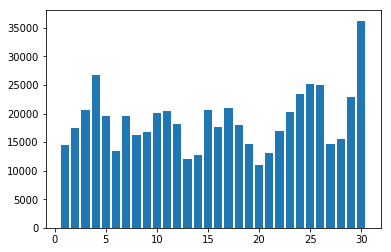

In [38]:
bar(range(1, 31), by_date)

In [40]:
## Sort the day
by_date_sorted = by_date.sort_values()
by_date_sorted

DayOfMonth
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

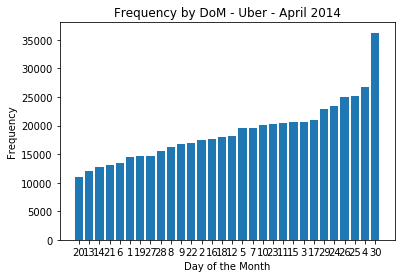

In [44]:
bar(range(1, 31), by_date_sorted)
xticks(range(1, 31), by_date_sorted.index)
xlabel('Day of the Month')
ylabel('Frequency')
title('Frequency by DoM - Uber - April 2014');

## Analysis by hour

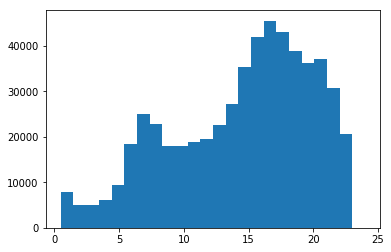

In [47]:
hist(data.Hour, bins=24, range=(.5, 24));

## Analysis by Weekday

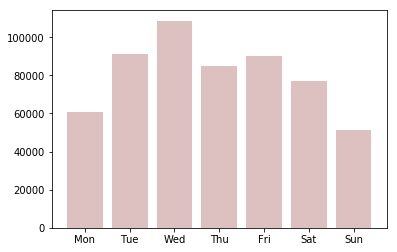

In [49]:
hist(data.WeekDay, bins=7, range =(-.5,6.5), rwidth=.8, color='#AA6666', alpha=.4)
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split());

## Cross analysis (Hour, DayOfWeek)

In [50]:
by_cross = data.groupby('WeekDay Hour'.split()).apply(count_rows).unstack()

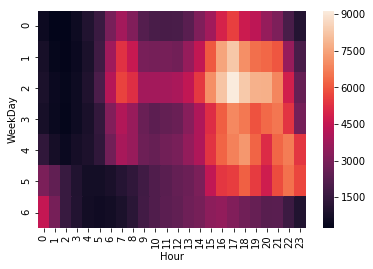

In [51]:
sn.heatmap(by_cross)

## By Latitude and Longitude

''

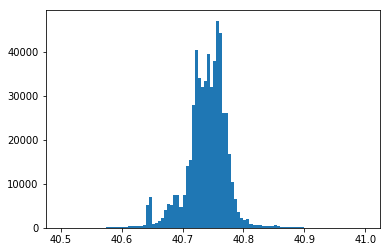

In [52]:
hist(data['Lat'], bins=100, range = (40.5, 41))
;

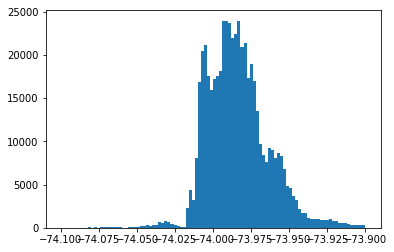

In [53]:
hist(data['Lon'], bins=100, range = (-74.1, -73.9));

## Cross between "Lat" and "Lon"

''

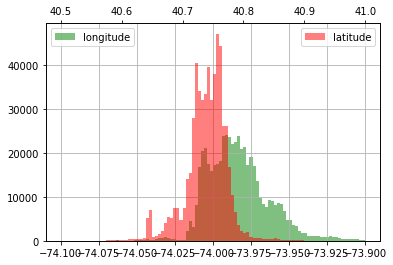

In [54]:
hist(data['Lon'], bins=100, range = (-74.1, -73.9), color='g', alpha=.5, label = 'longitude')
grid()
legend(loc='upper left')
twiny()
hist(data['Lat'], bins=100, range = (40.5, 41), color='r', alpha=.5, label = 'latitude')
legend(loc='best')
;

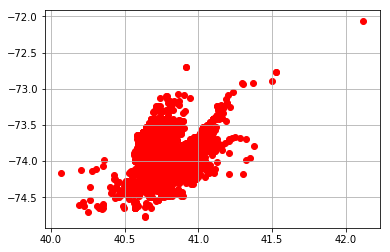

In [59]:
scatter(data['Lat'], data['Lon'], c='red')
grid()

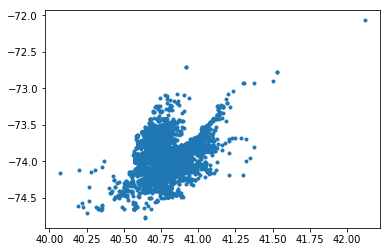

In [60]:
plot(data['Lat'], data['Lon'], '.')

(40.7, 41)

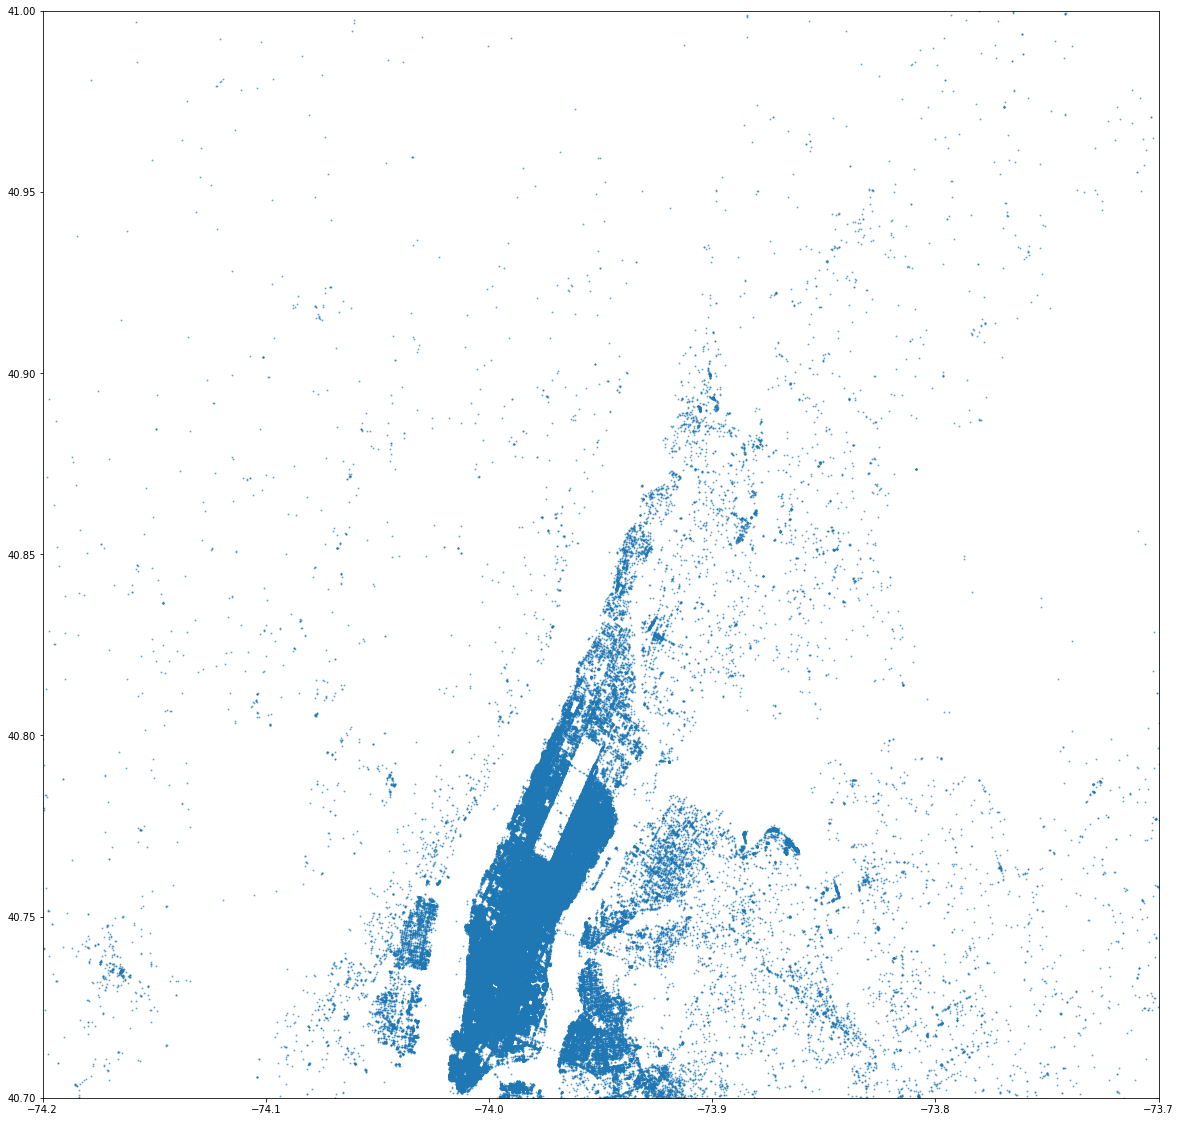

In [61]:
figure(figsize=(20, 20))
plot(data['Lon'], data['Lat'], '.', ms=2, alpha=.5)
xlim(-74.2, -73.7)
ylim(40.7, 41)